[0, 1, 5, 6, 2, 7, 8, 3, 4, 9]


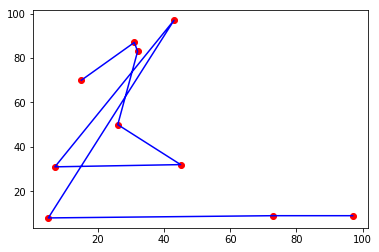

In [1]:
'''
 -------------------------------------------------------------------------
 Function:
 [RD,CD,order]=optics(x,k)
 -------------------------------------------------------------------------
 Aim:
 Ordering objects of a data set to obtain the clustering structure
 -------------------------------------------------------------------------
 Input:
 x - data set (m,n); m-objects, n-variables
 k - number of objects in a neighborhood of the selected object
 (minimal number of objects considered as a cluster)
 -------------------------------------------------------------------------
 Output:
 RD - vector with reachability distances (m,1)
 CD - vector with core distances (m,1)
 order - vector specifying the order of objects (1,m)
 -------------------------------------------------------------------------
 Example of use:
 x=[randn(30,2)*.4;randn(40,2)*.5+ones(40,1)*[4 4]];
 [RD,CD,order]=optics(x,4)
 -------------------------------------------------------------------------
 References:
 [1] M. Ankrest, M. Breunig, H. Kriegel, J. Sander,
 OPTICS: Ordering Points To Identify the Clustering Structure,
 available from www.dbs.informatik.uni-muenchen.de/cgi-bin/papers?query=--CO
 [2] M. Daszykowski, B. Walczak, D.L. Massart, Looking for natural
 patterns in analytical data. Part 2. Tracing local density
 with OPTICS, J. Chem. Inf. Comput. Sci. 42 (2002) 500-507
 -------------------------------------------------------------------------
 Written by Michal Daszykowski
 Department of Chemometrics, Institute of Chemistry,
 The University of Silesia
 December 2004
 http://www.chemometria.us.edu.pl


ported to python Jan, 2009 by Brian H. Clowers, Pacific Northwest National Laboratory.
Dependencies include scipy, numpy, and hcluster.
bhclowers at gmail.com
'''


import numpy as N
import pylab as P
import hcluster as H


def optics(x, k, distMethod = 'euclidean'):
    if len(x.shape)>1:
        m,n = x.shape
    else:
        m = x.shape[0]
        n == 1

    try:
        D = H.squareform(H.pdist(x, distMethod))
        distOK = True
    except:
        print("squareform or pdist error")
        distOK = False


    CD = N.zeros(m)
    RD = N.ones(m)*1E10

    for i in range(m):
        #again you can use the euclid function if you don't want hcluster
#        d = euclid(x[i],x)
#        d.sort()
#        CD[i] = d[k]

        tempInd = D[i].argsort()
        tempD = D[i][tempInd]
#        tempD.sort() #we don't use this function as it changes the reference
        CD[i] = tempD[k]#**2


    order = []
    seeds = N.arange(m, dtype = N.int)

    ind = 0
    while len(seeds) != 1:
#    for seed in seeds:
        ob = seeds[ind]
        seedInd = N.where(seeds != ob)
        seeds = seeds[seedInd]

        order.append(ob)
        tempX = N.ones(len(seeds))*CD[ob]
        tempD = D[ob][seeds]#[seeds]
        #you can use this function if you don't want to use hcluster
        #tempD = euclid(x[ob],x[seeds])

        temp = N.column_stack((tempX, tempD))
        mm = N.max(temp, axis = 1)
        ii = N.where(RD[seeds]>mm)[0]
        RD[seeds[ii]] = mm[ii]
        ind = N.argmin(RD[seeds])


    order.append(seeds[0])
    RD[0] = 0 #we set this point to 0 as it does not get overwritten
    return RD, CD, order

def euclid(i, x):
    """euclidean(i, x) -> euclidean distance between x and y"""
    y = N.zeros_like(x)
    y += 1
    y *= i
#    if len(x) != len(y):
#        raise ValueError, "vectors must be same length"

    d = (x-y)**2
    return N.sqrt(N.sum(d, axis = 1))



if __name__ == "__main__":

    testX = N.array([[ 15.,  70.],
                    [ 31.,  87.],
                    [ 45.,  32.],
                    [  5.,   8.],
                    [ 73.,   9.],
                    [ 32.,  83.],
                    [ 26.,  50.],
                    [  7.,  31.],
                    [ 43.,  97.],
                    [ 97.,   9.]])

#    mlabOrder = N.array(1,2,6,7,3,8,9,4,5,10) #the order returned by the original MATLAB code
# Remeber MATLAB counts from 1, python from 0


    P.plot(testX[:,0], testX[:,1], 'ro')
    RD, CD, order = optics(testX, 4)
    testXOrdered = testX[order]
    P.plot(testXOrdered[:,0], testXOrdered[:,1], 'b-')

    print(order)

    P.show()

In [2]:
import numpy as np

In [3]:
# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

X = np.empty((0, 2))
X = np.r_[X, [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)]
X = np.r_[X, [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)]
X = np.r_[X, [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)]
X = np.r_[X, [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)]
X = np.r_[X, [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)]
X = np.r_[X, [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)]


In [4]:
RD, CD, order = optics(X,9)

In [5]:
RD

array([0.        , 0.60600471, 0.47201337, ..., 1.13464964, 0.44616064,
       0.62996234])